In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Dataset

In [4]:
testData = pd.read_csv('test.csv')
trainData = pd.read_csv('train.csv')
storeData = pd.read_csv('store.csv')
sampleData = pd.read_csv('sample_submission.csv')

<ipython-input-4-273936daa6ae>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trainData = pd.read_csv('train.csv')


In [5]:
# sampleData.head()
sampleData.shape

(41088, 2)

In [117]:
testData.shape

(41088, 15)

# EDA
# Data Summarizaton

In [6]:
def summarize_data(df):
    # Basic Information
    def basic_info(df):
        print(df.info())
        print(df.describe(include='all'))
        print(df.isnull().sum())

    # Specific Summarizations
    def specific_summarizations(df):
        num_records = df.shape[0]
        num_unique_values = df.nunique()

        print(f'Number of records: {num_records}')
        print('Number of unique values per column:')
        print(num_unique_values)

        for column in df.columns:
            if df[column].dtype == 'object':
                print(f'\nTop 5 most frequent values in column "{column}":')
                print(df[column].value_counts().head())
            elif df[column].dtype in ['int64', 'float64']:
                total = df[column].sum()
                mean = df[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')

                if pd.to_datetime(df[column], errors='coerce').notnull().all():
                    df[column] = pd.to_datetime(df[column])
                    messages_per_period = df[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period)

        numeric_columns = df.select_dtypes(include=['number']).columns
        if not numeric_columns.empty:
            top_messages = df.nlargest(5, numeric_columns[0])
            print('\nTop 5 records by the first numerical column:')
            print(top_messages)
        else:
            print('\nNo numerical columns to display top records.')


    # Calling functions
    print("Basic Information:")
    basic_info(df)
    print("\nSpecific Summarizations:")
    specific_summarizations(df)

In [7]:
summarize_data(trainData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq  

In [43]:
trainData.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993522,1970-01-01 00:00:00.000000843,1970-01-01 00:00:00.000000002,2013-01-22,1970-01-01 00:00:00.000010206,1970-01-01 00:00:00.000001164,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,0,1970-01-01
764629,1970-01-01 00:00:00.000000525,1970-01-01 00:00:00.000000004,2013-08-15,1970-01-01 00:00:00.000010615,1970-01-01 00:00:00.000000899,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,0,1970-01-01
710214,1970-01-01 00:00:00.000000745,1970-01-01 00:00:00.000000004,2013-10-03,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,a,1970-01-01
818386,1970-01-01 00:00:00.000000762,1970-01-01 00:00:00.000000005,2013-06-28,1970-01-01 00:00:00.000003382,1970-01-01 00:00:00.000000346,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,0,1970-01-01
341512,1970-01-01 00:00:00.000000489,1970-01-01 00:00:00.000000003,2014-09-10,1970-01-01 00:00:00.000006156,1970-01-01 00:00:00.000000580,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,0,1970-01-01


In [ ]:
summarize_data(testData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None
                  Id         Store     DayOfWeek        Date          Open  \
count   41088.000000  41088.000000  41088.000000       41088  41077.000000   
unique           NaN           NaN           NaN          48           NaN   
top              NaN           NaN           NaN  2015-09-17           NaN   
freq             NaN           NaN           NaN      

In [8]:
# The data summary above shows that we have 11 missing data on open and since open is catagorical we impute it uwing mode
mode = testData['Open'].mode()[0]
testData['Open'].fillna(mode, inplace = True)
testData.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
summarize_data(storeData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
             Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique

In [ ]:
# Since the columns 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' have 544 missing values out toptal of 571 and the few present data can't be sepresentative we shoul drop the columns
storeData.drop(columns=['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], inplace=True)

In [ ]:
storeData.sample(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
253,1970-01-01 00:00:00.000000254,d,a,330.0,3.0,2008.0,1970-01-01 00:00:00.000000001
387,1970-01-01 00:00:00.000000388,a,a,2260.0,NaN,NaN,1970-01-01 00:00:00.000000000
865,1970-01-01 00:00:00.000000866,d,a,9680.0,NaN,NaN,1970-01-01 00:00:00.000000001
376,1970-01-01 00:00:00.000000377,a,c,100.0,6.0,2010.0,1970-01-01 00:00:00.000000001
143,1970-01-01 00:00:00.000000144,a,c,16570.0,NaN,NaN,1970-01-01 00:00:00.000000000


In [9]:
# Since the columns 'CompetitionOpenSinceMonth', 'CompetitionDistance' and 'CompetitionOpenSinceYear' have less than half missing data we imute them
mode = storeData['CompetitionOpenSinceMonth'].mode()[0]
storeData['CompetitionOpenSinceMonth'].fillna(mode, inplace=True)
median = storeData['CompetitionOpenSinceYear'].median()
storeData['CompetitionOpenSinceYear'].fillna(median, inplace=True)
median = storeData['CompetitionDistance'].median()
storeData['CompetitionDistance'].fillna(median, inplace=True)
storeData.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [118]:
summarize_data(sampleData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
None
                 Id    Sales
count  41088.000000  41088.0
mean   20544.500000      0.0
std    11861.228267      0.0
min        1.000000      0.0
25%    10272.750000      0.0
50%    20544.500000      0.0
75%    30816.250000      0.0
max    41088.000000      0.0
Id       0
Sales    0
dtype: int64

Specific Summarizations:
Number of records: 41088
Number of unique values per column:
Id       41088
Sales        1
dtype: int64

Total of column "Id": 844132416
Mean of column "Id": 20544.50

Number of records per month for column "Id":
Id
1970-01    41088
Freq: M, Name: count, dtype: int64

Total of column "Sales": 0
Mean of column "Sales": 0.00

Number of records per month for column "

# Univariant Analysis

In [ ]:
def univariate_analysis(df):
    def analyze_column(column):
        print(f"Analysis for column: {column.name}")
        # Visualization
        plt.figure(figsize=(10, 6))

        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30)
            plt.title(f'Histogram of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line')
            plt.title(f'Time Series of {column.name}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')
        else:
            column.value_counts().plot(kind='bar')
            plt.title(f'Bar Plot of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')

        plt.show()
        print("\n\n")

    for column in df.columns:
        analyze_column(df[column])

Analysis for column: Store


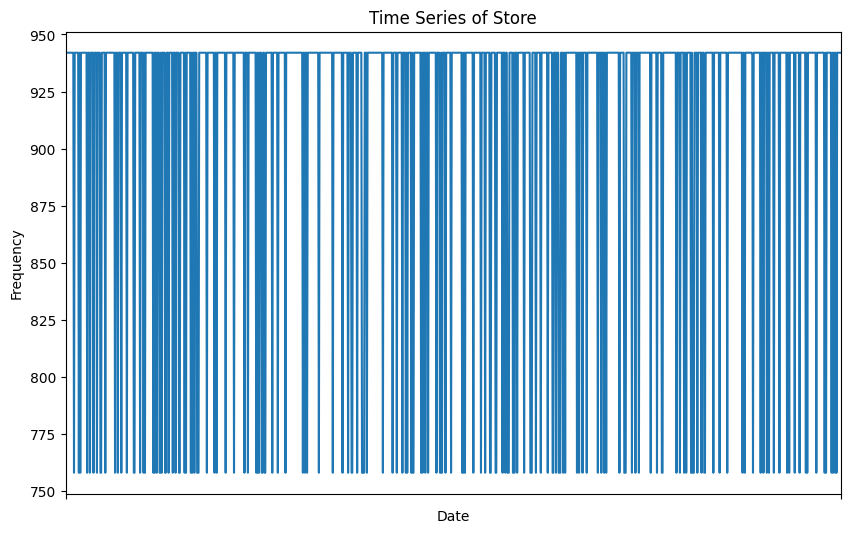




Analysis for column: DayOfWeek


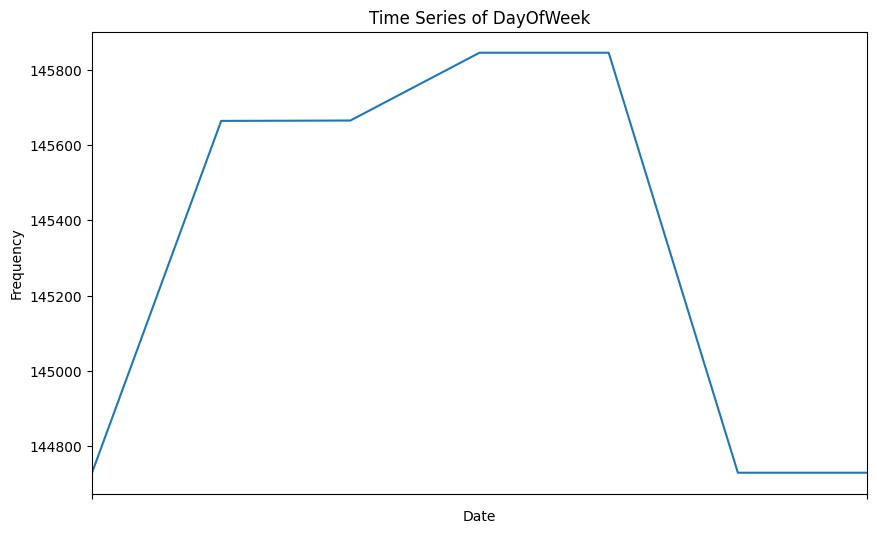




Analysis for column: Date


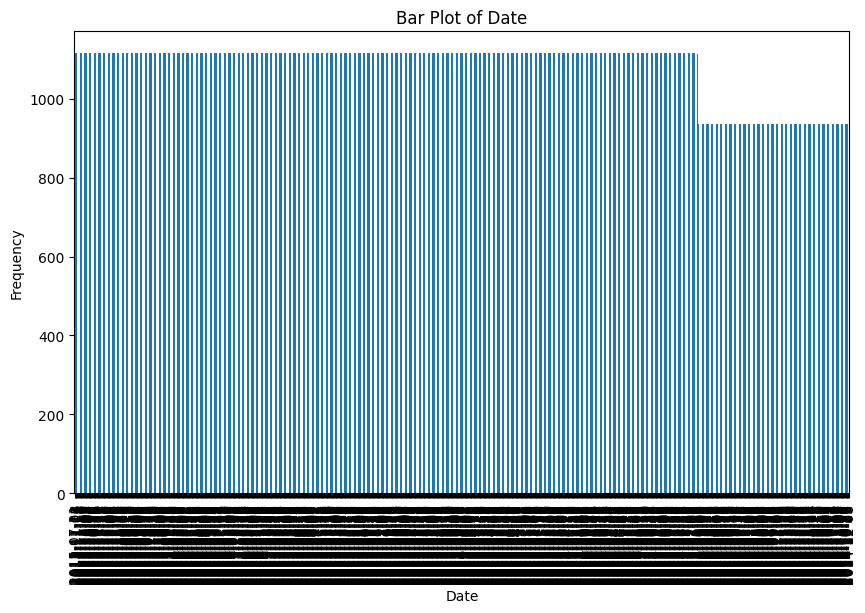




Analysis for column: Sales


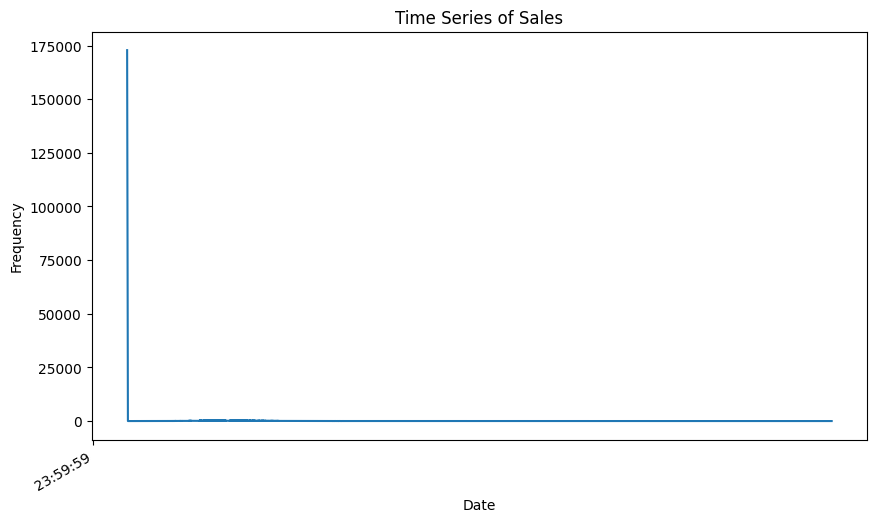




Analysis for column: Customers


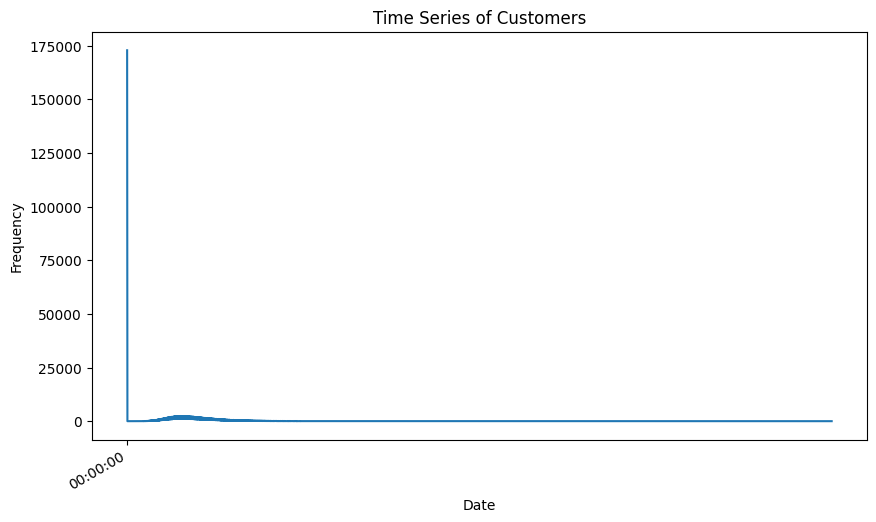




Analysis for column: Open


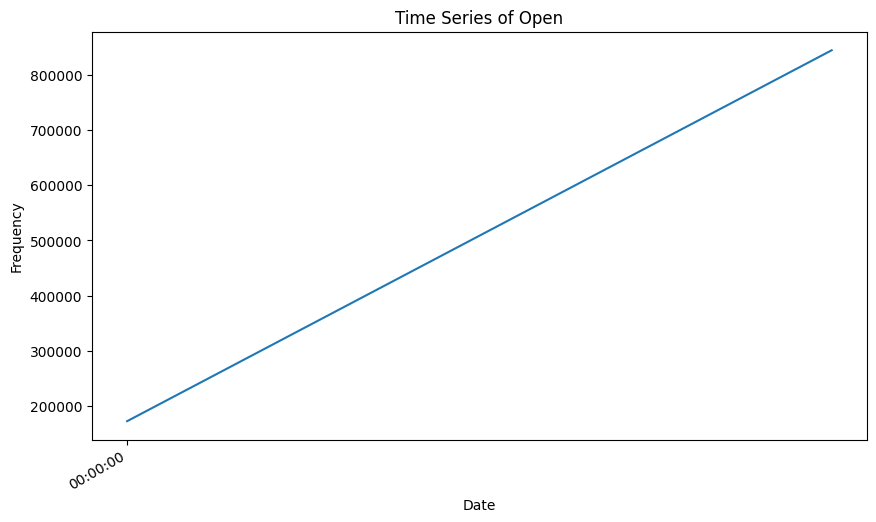




Analysis for column: Promo


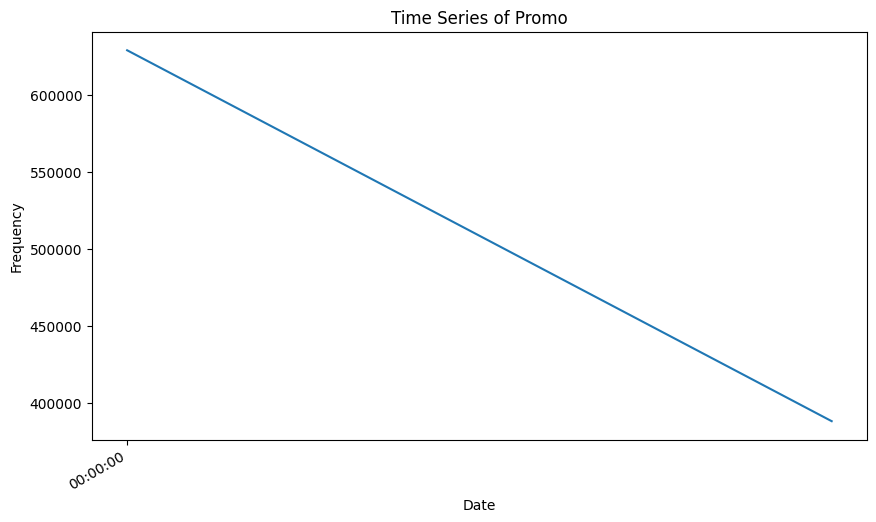




Analysis for column: StateHoliday


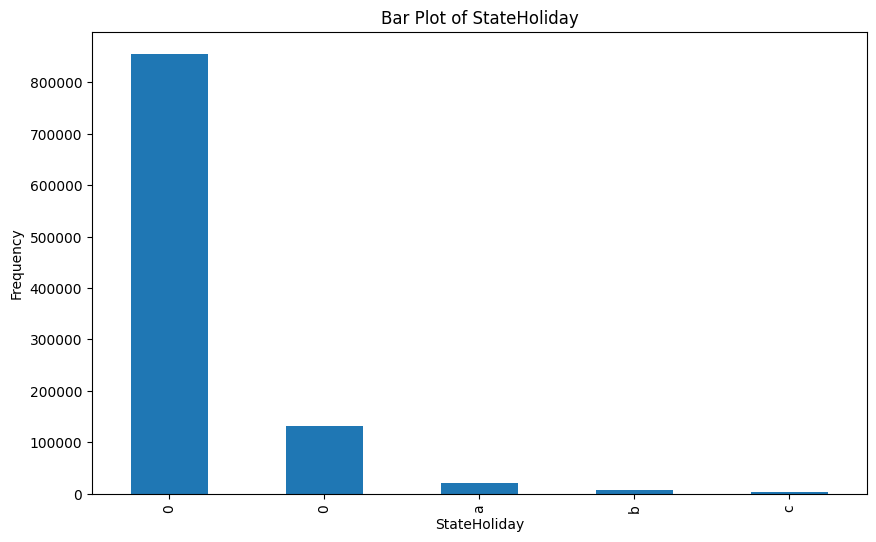




Analysis for column: SchoolHoliday


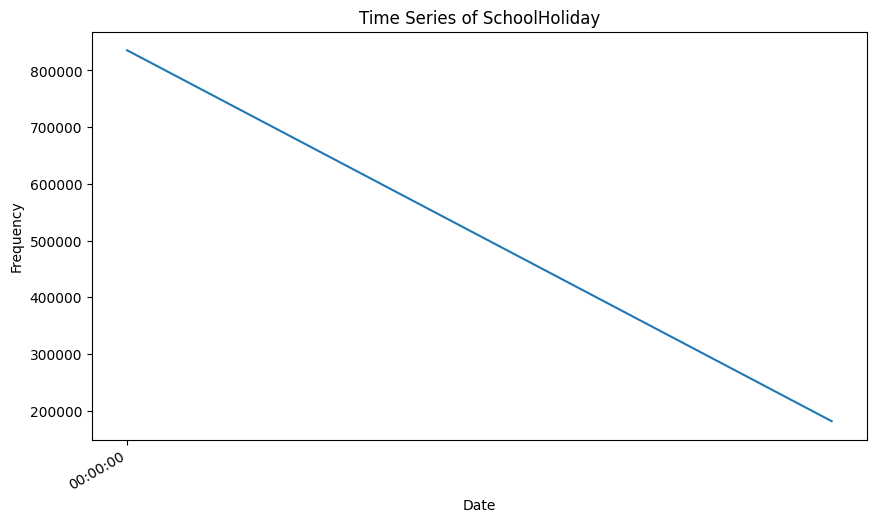

In [ ]:
univariate_analysis(trainData)

Analysis for column: Id


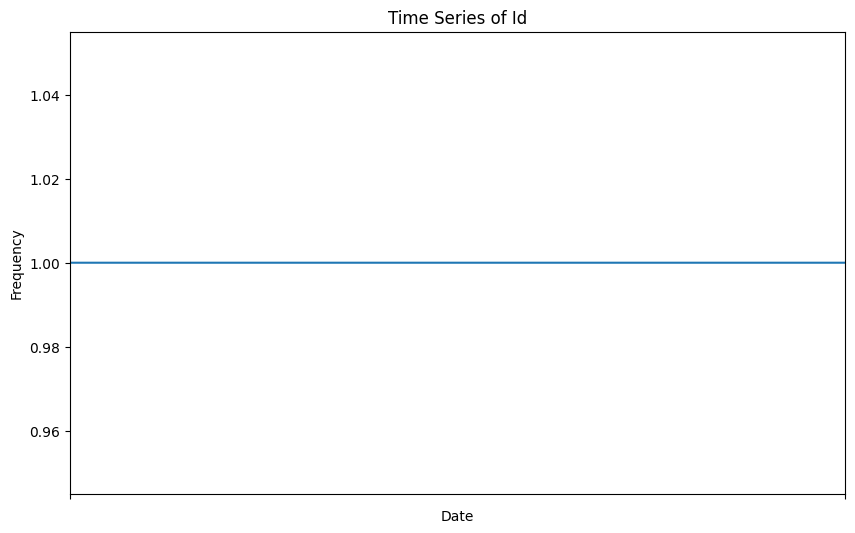




Analysis for column: Store


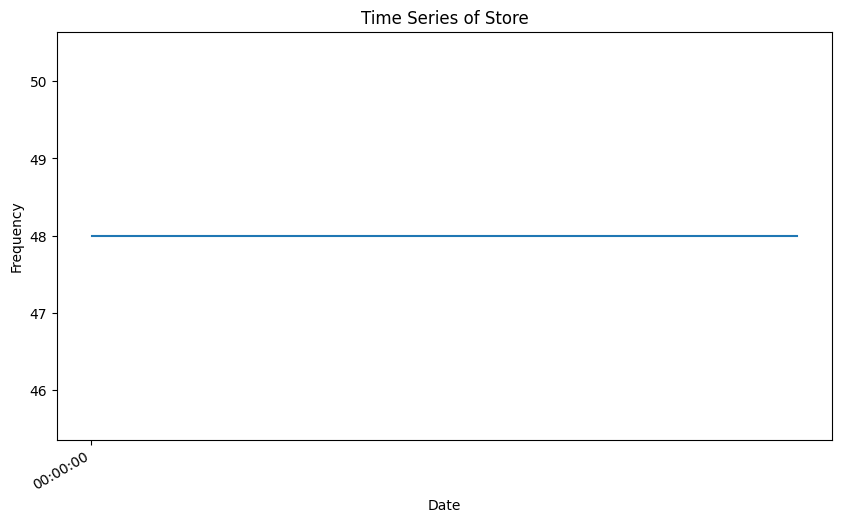




Analysis for column: DayOfWeek


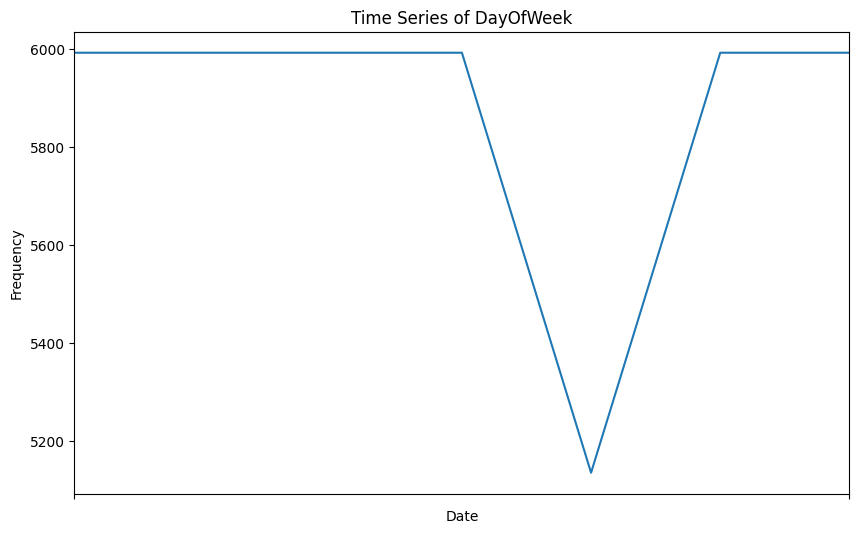




Analysis for column: Date


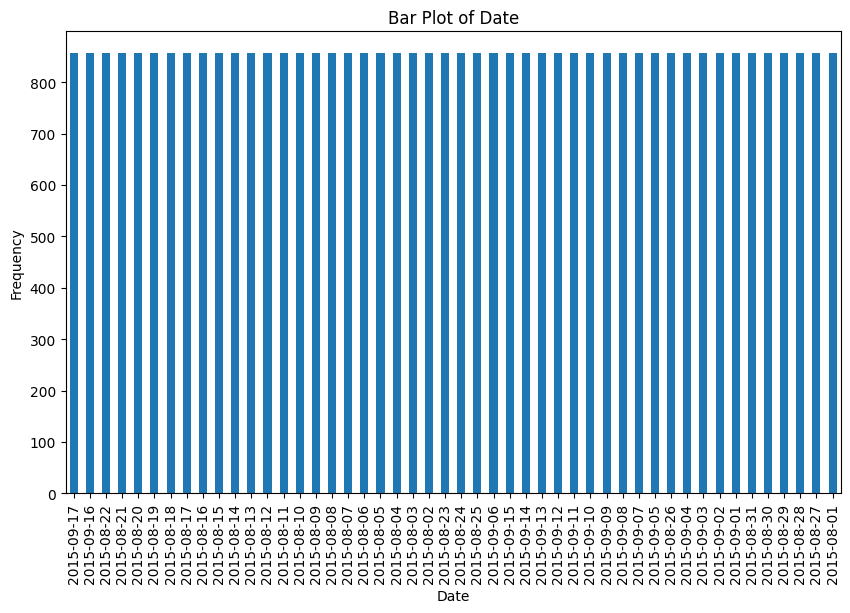




Analysis for column: Open


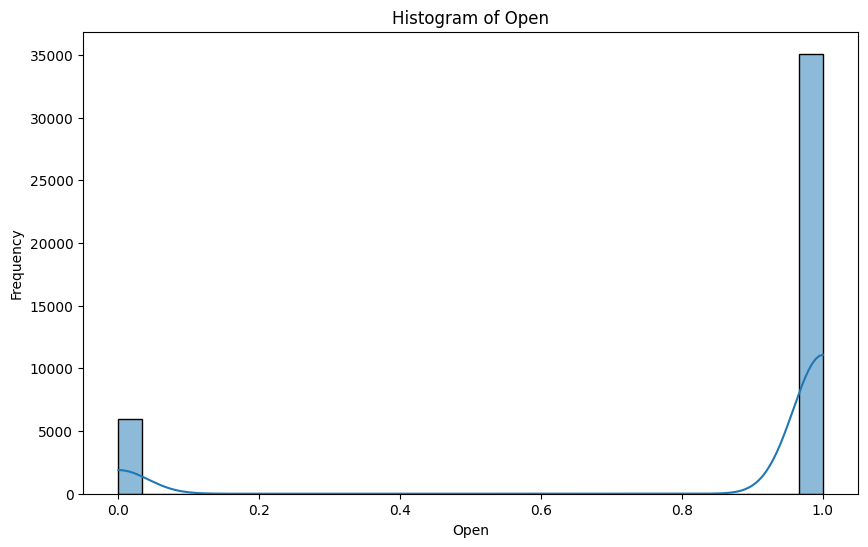




Analysis for column: Promo


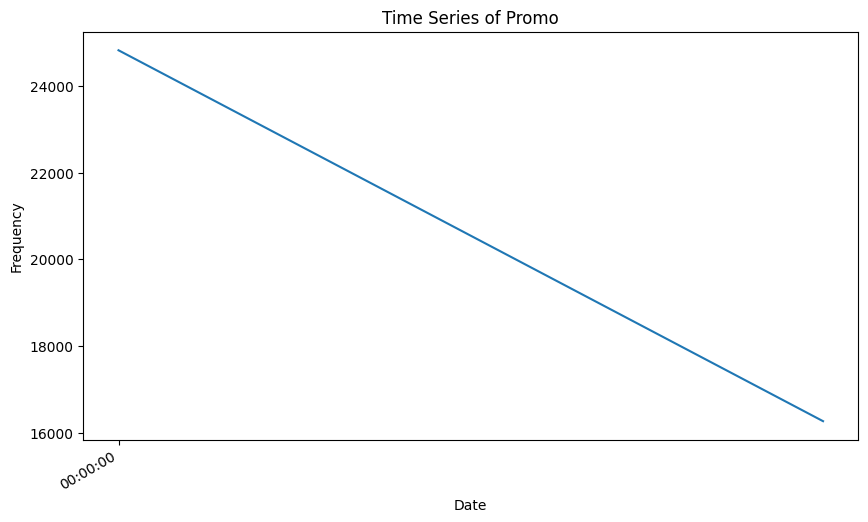




Analysis for column: StateHoliday


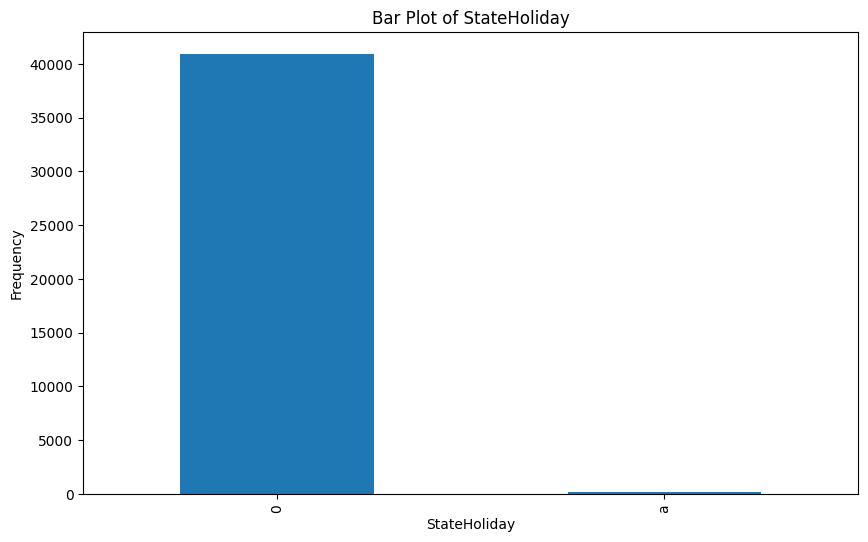




Analysis for column: SchoolHoliday


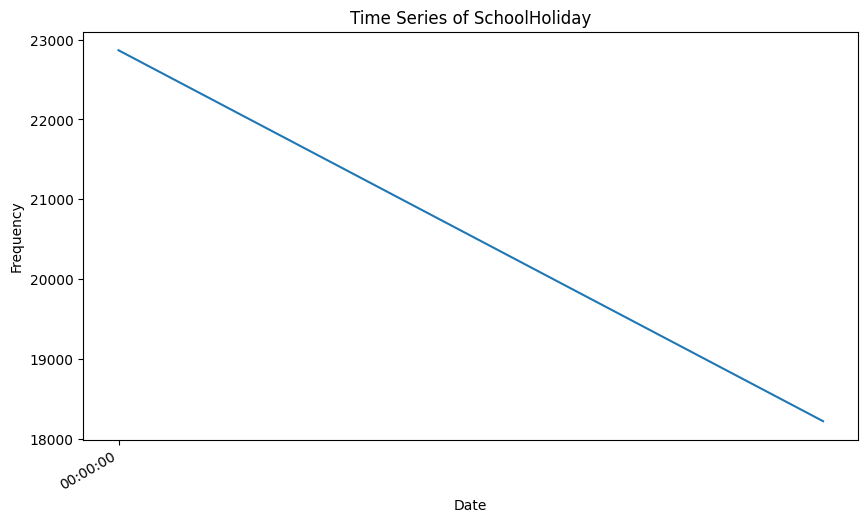

In [ ]:
univariate_analysis(testData)

Analysis for column: Store


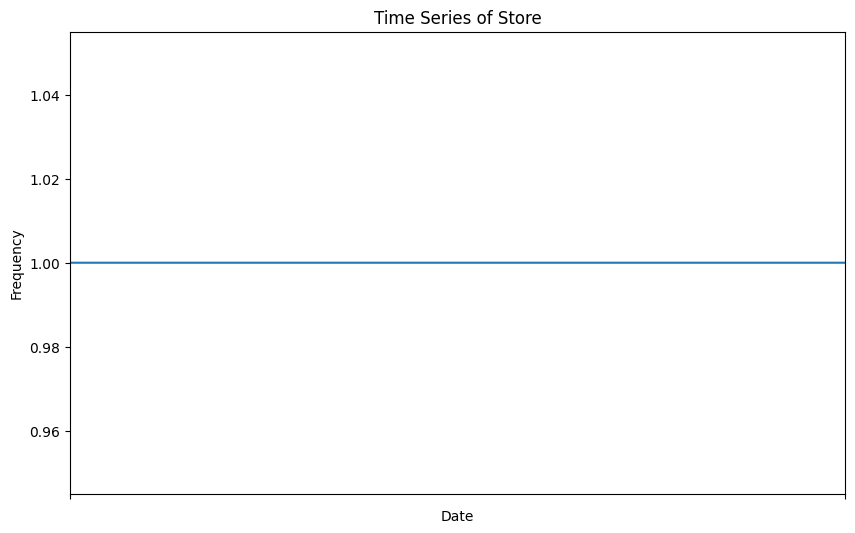




Analysis for column: StoreType


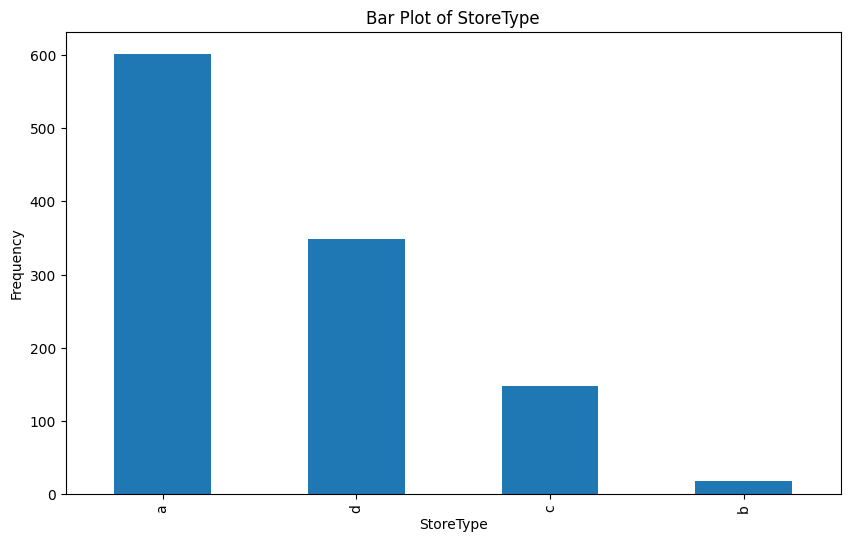




Analysis for column: Assortment


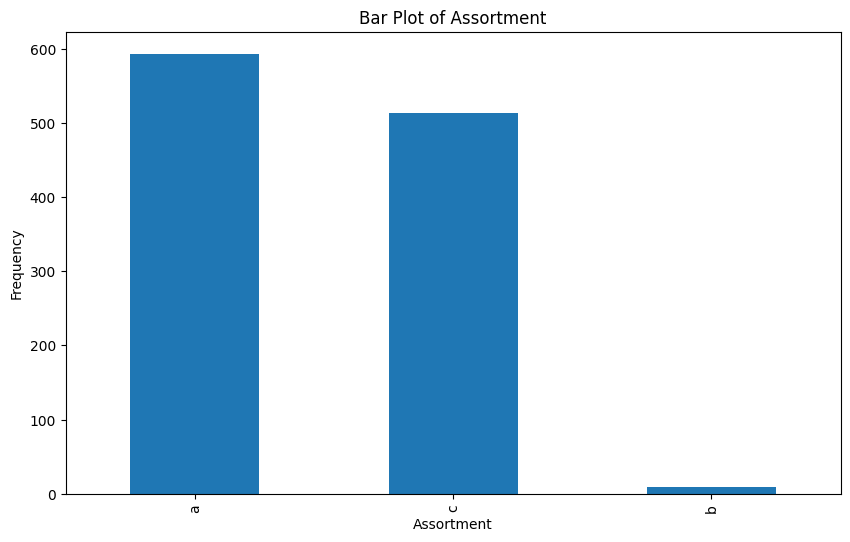




Analysis for column: CompetitionDistance


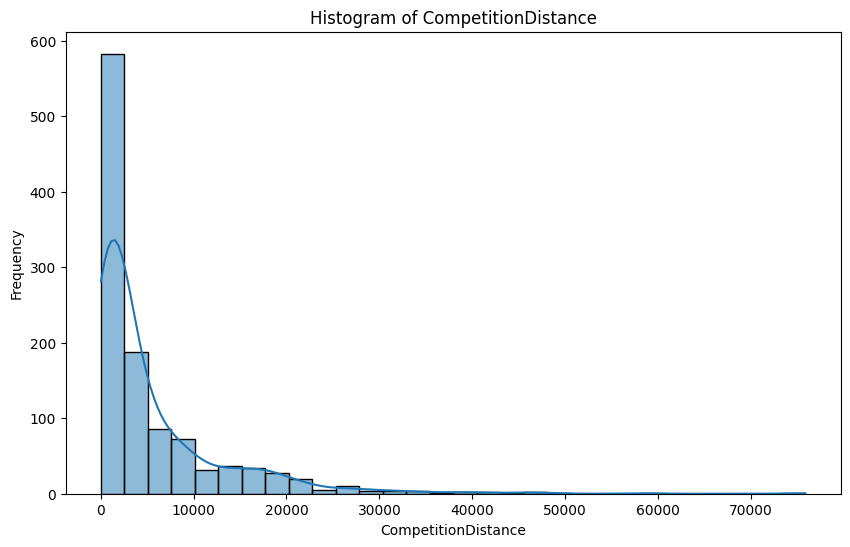




Analysis for column: CompetitionOpenSinceMonth


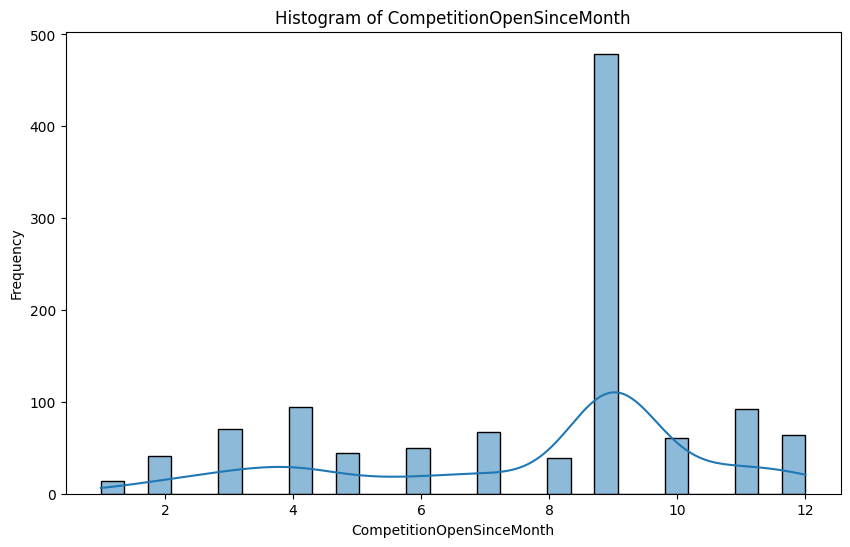




Analysis for column: CompetitionOpenSinceYear


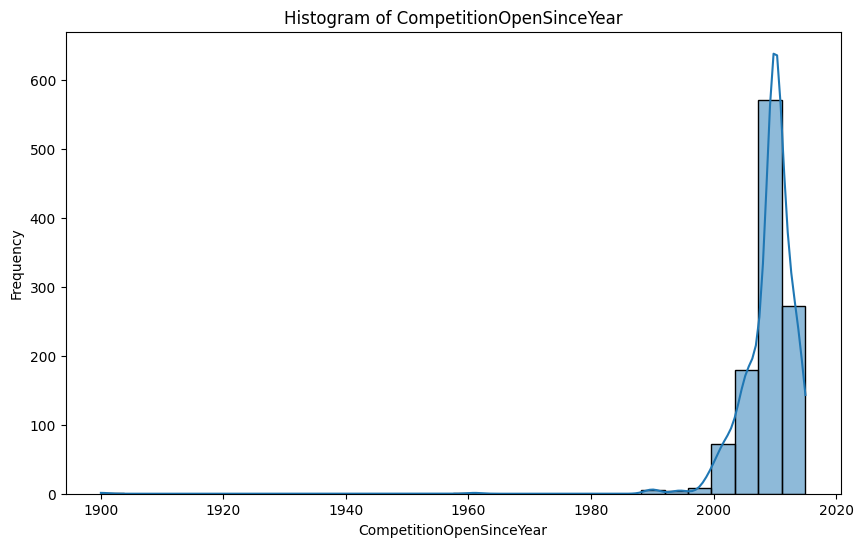




Analysis for column: Promo2


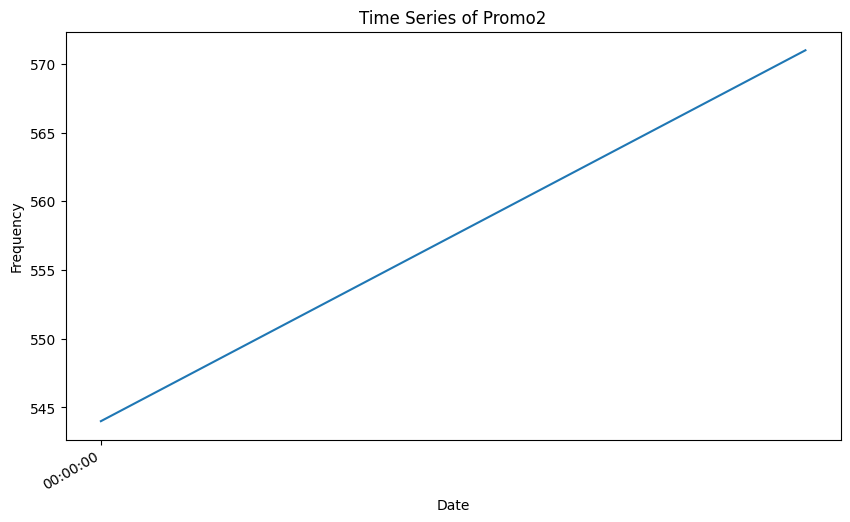

In [ ]:
univariate_analysis(storeData)

Analysis for column: Id


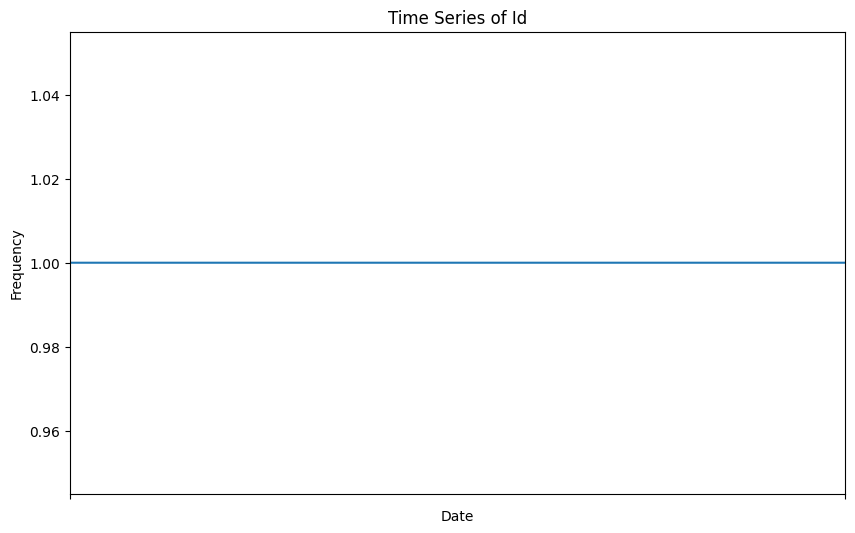




Analysis for column: Sales


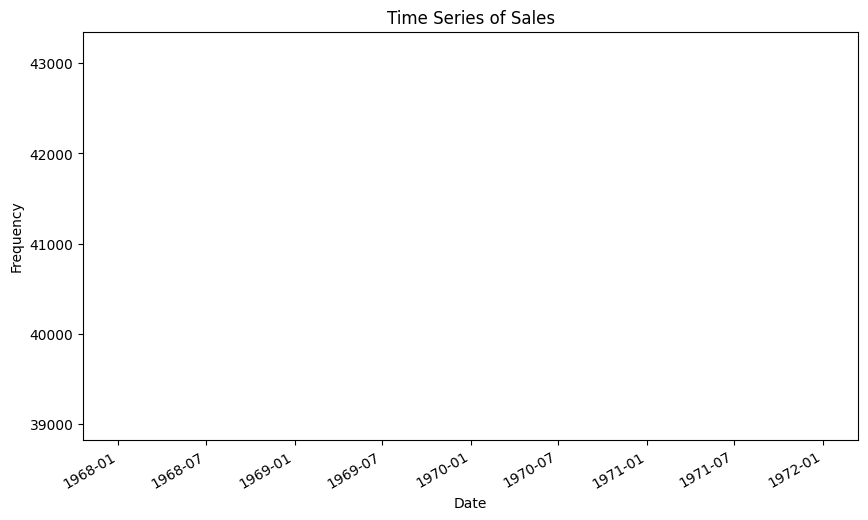

In [ ]:
univariate_analysis(sampleData)

# 1) Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


Train Data Promo Counts:
Promo
0.0    50447
1.0    33450
Name: count, dtype: int64

Test Data Promo Counts:
Promo
1970-01-01 00:00:00.000000000    24824
1970-01-01 00:00:00.000000001    16264
Name: count, dtype: int64

Train Data Promo Distribution:
Promo
0.0    0.601297
1.0    0.398703
Name: count, dtype: float64

Test Data Promo Distribution:
Promo
1970-01-01 00:00:00.000000000    0.604167
1970-01-01 00:00:00.000000001    0.395833
Name: count, dtype: float64


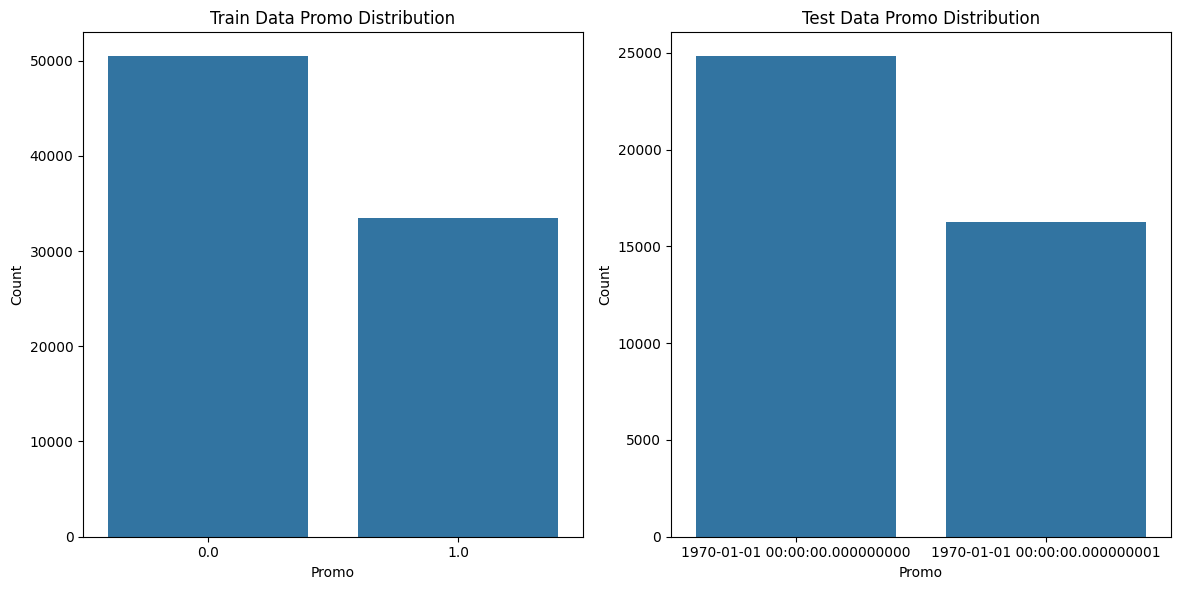


Chi-Square Test Results:
Chi2 Statistic: 124985.0
P-value: 0.0
The distributions of the 'promo' column in the train and test datasets are significantly different.


In [ ]:
from scipy.stats import chi2_contingency

# 1. Check value counts
train_promo_counts = trainData['Promo'].value_counts()
test_promo_counts = testData['Promo'].value_counts()

print("Train Data Promo Counts:")
print(train_promo_counts)
print("\nTest Data Promo Counts:")
print(test_promo_counts)

# Normalize the counts to compare distributions
train_promo_dist = train_promo_counts / train_promo_counts.sum()
test_promo_dist = test_promo_counts / test_promo_counts.sum()

print("\nTrain Data Promo Distribution:")
print(train_promo_dist)
print("\nTest Data Promo Distribution:")
print(test_promo_dist)

# 2. Visualize the distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=train_promo_counts.index, y=train_promo_counts.values, ax=ax[0])
ax[0].set_title('Train Data Promo Distribution')
ax[0].set_xlabel('Promo')
ax[0].set_ylabel('Count')

sns.barplot(x=test_promo_counts.index, y=test_promo_counts.values, ax=ax[1])
ax[1].set_title('Test Data Promo Distribution')
ax[1].set_xlabel('Promo')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 3. Perform a chi-square test
# Create a contingency table
contingency_table = pd.concat([train_promo_counts, test_promo_counts], axis=1)
contingency_table.columns = ['train', 'test']
contingency_table.fillna(0, inplace=True)

chi2, p, dof, ex = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("The distributions of the 'promo' column in the train and test datasets are significantly different.")
else:
    print("The distributions of the 'promo' column in the train and test datasets are not significantly different.")

# Check & compare sales behavior before, during, and after holidays


In [ ]:
# Convert 'Date' column to datetime
trainData['Date'] = pd.to_datetime(trainData['Date'])

# Add a 'Holiday' column indicating if it's either a state or school holiday
trainData['Holiday'] = trainData.apply(lambda row: row['StateHoliday'] != '0' or row['SchoolHoliday'] == 1, axis=1)



In [ ]:
# Add a 'HolidayType' column to specify the type of state holiday
trainData['HolidayType'] = trainData['StateHoliday'].map({'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas', '0': 'None'})
trainData.loc[trainData['SchoolHoliday'] == 1, 'HolidayType'] = 'School Holiday'

# Sort by Date
trainData.sort_values(by='Date', inplace=True)

In [ ]:
# Define periods: before, during, and after holidays
# Here we assume 'before' is 1 day before, 'during' is the day of the holiday, and 'after' is 1 day after
# This is an example and can be adjusted according to the actual analysis requirement

trainData['Period'] = 'Regular'
trainData.loc[trainData['Holiday'], 'Period'] = 'During Holiday'
trainData.loc[trainData['Date'].shift(-1).isin(trainData.loc[trainData['Holiday'], 'Date']), 'Period'] = 'Before Holiday'
trainData.loc[trainData['Date'].shift(1).isin(trainData.loc[trainData['Holiday'], 'Date']), 'Period'] = 'After Holiday'

# Check the Period assignment
print(trainData[['Date', 'StateHoliday', 'SchoolHoliday', 'Holiday', 'HolidayType', 'Period']])

# Calculate average sales in each period
average_sales = trainData.groupby('Period')['Sales'].mean().reset_index()

print("\nAverage Sales by Period:")
print(average_sales)

              Date StateHoliday                 SchoolHoliday  Holiday  \
1017208 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1016473 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1016472 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1016471 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1016470 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
...            ...          ...                           ...      ...   
745     2015-07-31            0 1970-01-01 00:00:00.000000001    False   
746     2015-07-31            0 1970-01-01 00:00:00.000000001    False   
747     2015-07-31            0 1970-01-01 00:00:00.000000001    False   
741     2015-07-31            0 1970-01-01 00:00:00.000000001    False   
0       2015-07-31            0 1970-01-01 00:00:00.000000001    False   

            HolidayType          Period  
1017208  Public Holiday  Before Holiday  
1016473  Public Holiday   A

<ipython-input-49-8b3fcbc4fb37>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Period', y='Sales', data=trainData, estimator=sum, ci=None)


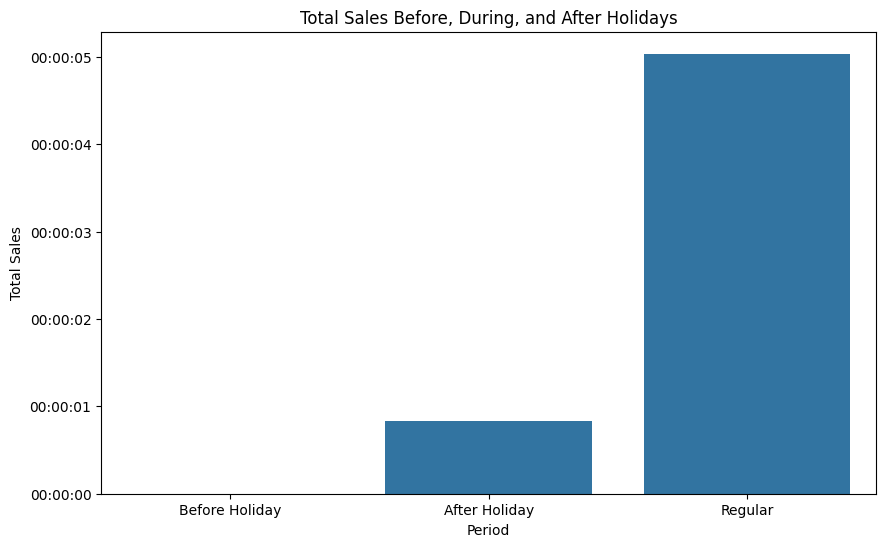

In [ ]:
# Visualize the sales behavior

plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Sales', data=trainData, estimator=sum, ci=None)
plt.title('Total Sales Before, During, and After Holidays')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.show()

# Find out any seasonal (Christmas, Easter, etc) purchase behaviors,


In [ ]:
# Add a 'HolidayType' column to specify the type of state holiday
trainData['HolidayType'] = trainData['StateHoliday'].map({'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas', '0': 'None'})
trainData.loc[trainData['SchoolHoliday'] == 1, 'HolidayType'] = 'School Holiday'

# Sort by Date
trainData.sort_values(by='Date', inplace=True)

# Define periods for Christmas and Easter
trainData['Period'] = 'Regular'
# During Christmas and Easter
trainData.loc[trainData['StateHoliday'] == 'c', 'Period'] = 'During Christmas'
trainData.loc[trainData['StateHoliday'] == 'b', 'Period'] = 'During Easter'
# Before Christmas and Easter
trainData.loc[trainData['Date'].shift(-1).isin(trainData.loc[trainData['StateHoliday'] == 'c', 'Date']), 'Period'] = 'Before Christmas'
trainData.loc[trainData['Date'].shift(-1).isin(trainData.loc[trainData['StateHoliday'] == 'b', 'Date']), 'Period'] = 'Before Easter'
# After Christmas and Easter
trainData.loc[trainData['Date'].shift(1).isin(trainData.loc[trainData['StateHoliday'] == 'c', 'Date']), 'Period'] = 'After Christmas'
trainData.loc[trainData['Date'].shift(1).isin(trainData.loc[trainData['StateHoliday'] == 'b', 'Date']), 'Period'] = 'After Easter'

# Check the Period assignment
print(trainData[['Date', 'StateHoliday', 'HolidayType', 'Period']])

# Calculate average sales in each period
average_sales = trainData.groupby('Period')['Sales'].mean().reset_index()

print("\nAverage Sales by Period:")
print(average_sales)

              Date StateHoliday     HolidayType   Period
1017208 2013-01-01            a  Public Holiday  Regular
1017205 2013-01-01            a  Public Holiday  Regular
1017204 2013-01-01            a  Public Holiday  Regular
1017203 2013-01-01            a  Public Holiday  Regular
1017202 2013-01-01            a  Public Holiday  Regular
...            ...          ...             ...      ...
6       2015-07-31            0            None  Regular
5       2015-07-31            0            None  Regular
4       2015-07-31            0            None  Regular
10      2015-07-31            0            None  Regular
0       2015-07-31            0            None  Regular

[1017209 rows x 4 columns]

Average Sales by Period:
             Period                         Sales
0   After Christmas 1970-01-01 00:00:00.000000170
1      After Easter 1970-01-01 00:00:00.000000219
2  Before Christmas 1970-01-01 00:00:00.000002532
3     Before Easter 1970-01-01 00:00:00.000002044
4           

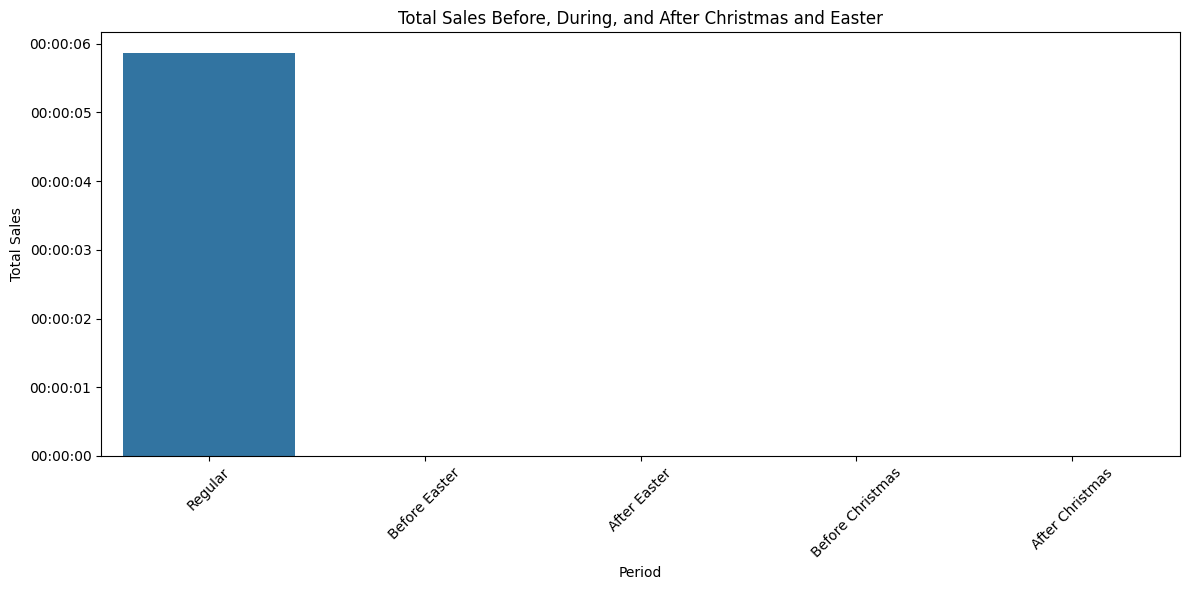

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Period', y='Sales', data=trainData, estimator=sum, errorbar=None)
plt.title('Total Sales Before, During, and After Christmas and Easter')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What can you say about the correlation between sales and the number of customers?

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1017208 to 0
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  datetime64[ns]
 1   DayOfWeek      1017209 non-null  datetime64[ns]
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  datetime64[ns]
 4   Customers      1017209 non-null  datetime64[ns]
 5   Open           1017209 non-null  datetime64[ns]
 6   Promo          1017209 non-null  datetime64[ns]
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  datetime64[ns]
 9   Holiday        1017209 non-null  bool          
 10  HolidayType    886137 non-null   object        
 11  Period         1017209 non-null  object        
dtypes: bool(1), datetime64[ns](8), object(3)
memory usage: 94.1+ MB


In [ ]:
# Convert 'Sales' and 'Customers' columns to numerical type
trainData['Sales'] = pd.to_numeric(trainData['Sales'])
trainData['Customers'] = pd.to_numeric(trainData['Customers'])

# Calculate the Pearson correlation coefficient between 'Sales' and 'Customers'
correlation = trainData['Sales'].corr(trainData['Customers'])

print("Correlation between Sales and Customers:", correlation)

Correlation between Sales and Customers: 0.8947107733016968


# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [ ]:
# Group the data by promotion status
promo_groups = trainData.groupby('Promo')

# Calculate average sales and average number of customers for each group
avg_sales = promo_groups['Sales'].mean()
avg_customers = promo_groups['Customers'].mean()

print("Average Sales with and without Promotions:")
print(avg_sales)
print("\nAverage Customers with and without Promotions:")
print(avg_customers)

# Calculate average sales per customer for each group
avg_sales_per_customer = avg_sales / avg_customers

print("\nAverage Sales per Customer with and without Promotions:")
print(avg_sales_per_customer)

Average Sales with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    4406.050805
1970-01-01 00:00:00.000000001    7991.152046
Name: Sales, dtype: float64

Average Customers with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    517.823542
1970-01-01 00:00:00.000000001    820.098815
Name: Customers, dtype: float64

Average Sales per Customer with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    8.508788
1970-01-01 00:00:00.000000001    9.744133
dtype: float64


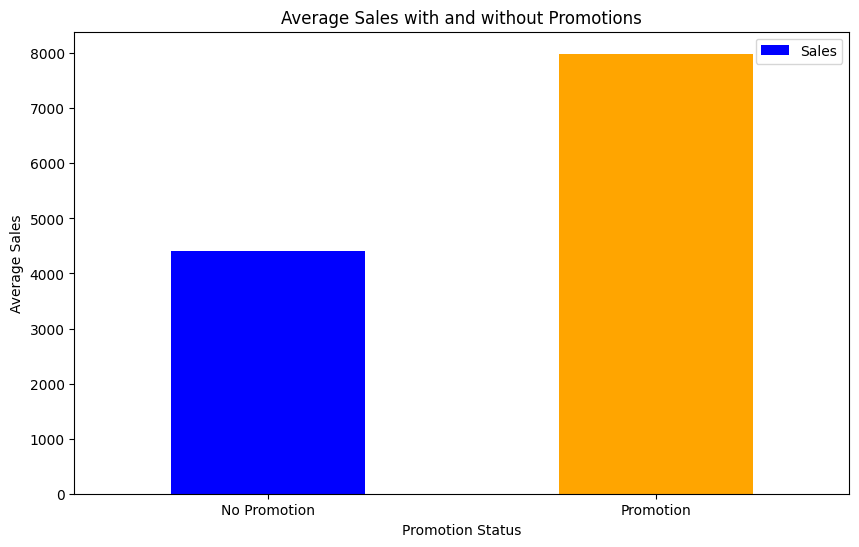

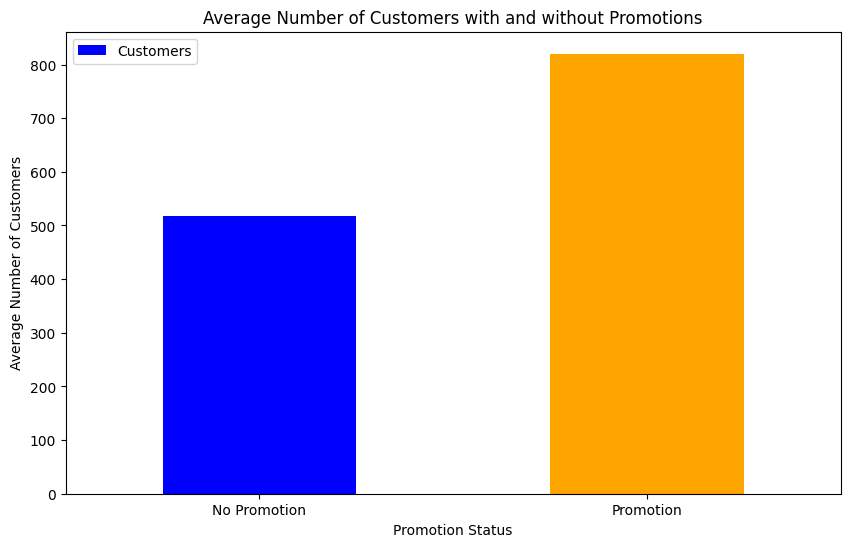

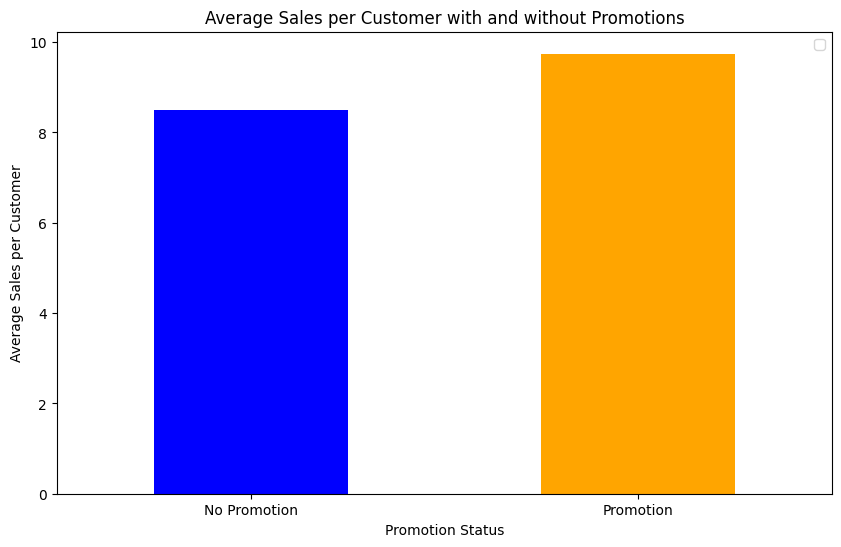

In [ ]:

# Plotting average sales with and without promotions
plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average number of customers with and without promotions
plt.figure(figsize=(10, 6))
avg_customers.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average sales per customer with and without promotions
plt.figure(figsize=(10, 6))
avg_sales_per_customer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales per Customer with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales per Customer')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

# Trends of customer behavior during store opening and closing times

In [ ]:
# Filter data for open hours
open_hours_data = trainData[trainData['Open'] == 1]

# Define time windows (e.g., 1 hour before and after opening/closing)
time_window = pd.Timedelta(hours=1)

# Calculate average number of customers during each time window
avg_customers_before_open = open_hours_data['Customers'].rolling(window=time_window, closed='right').mean()
avg_customers_after_close = open_hours_data['Customers'].rolling(window=time_window, closed='left').mean()


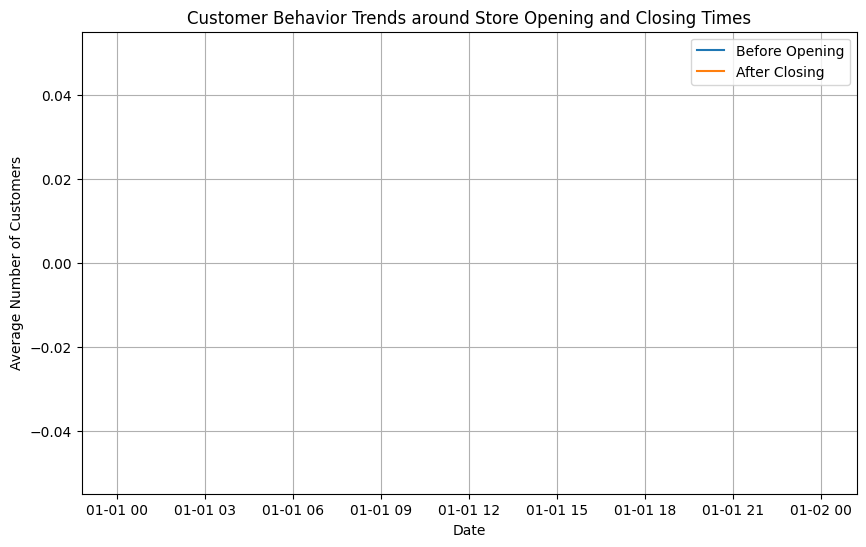

In [ ]:
# Plot customer behavior trends
plt.figure(figsize=(10, 6))
plt.plot(open_hours_data['Date'], avg_customers_before_open, label='Before Opening')
plt.plot(open_hours_data['Date'], avg_customers_after_close, label='After Closing')
plt.title('Customer Behavior Trends around Store Opening and Closing Times')
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.legend()
plt.grid(True)
plt.show()

# Which stores are open on all weekdays? How does that affect their sales on weekends?

In [ ]:
# Group the data by store and count the number of unique weekdays each store is open
store_open_weekdays = trainData[trainData['DayOfWeek'].isin([1, 2, 3, 4, 5])].groupby('Store')['DayOfWeek'].nunique()

# Filter stores that are open on all weekdays
stores_open_all_weekdays = store_open_weekdays[store_open_weekdays == 5].index.tolist()

# Filter data for stores open on all weekdays and weekends
stores_data = trainData[trainData['Store'].isin(stores_open_all_weekdays)]

# Calculate the average sales for each store on weekends
weekend_sales = stores_data[stores_data['DayOfWeek'].isin([6, 7])].groupby('Store')['Sales'].mean()

# Calculate the average sales for each store on weekdays
weekday_sales = stores_data[~stores_data['DayOfWeek'].isin([6, 7])].groupby('Store')['Sales'].mean()


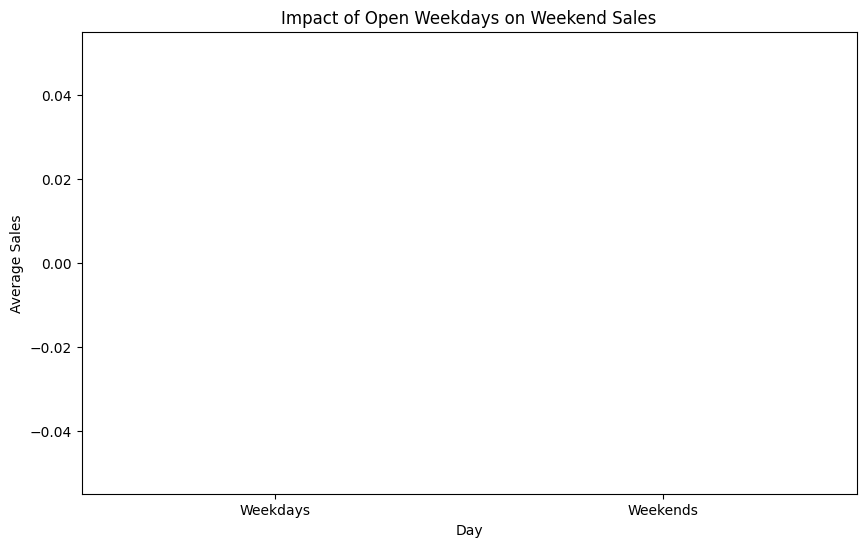

In [ ]:
# Visualize the impact on sales
plt.figure(figsize=(10, 6))
plt.boxplot([weekday_sales, weekend_sales], labels=['Weekdays', 'Weekends'])
plt.title('Impact of Open Weekdays on Weekend Sales')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

# Check how the assortment type affects sales

# Task 2

# 2.1 Preprocessing

In [44]:
trainData['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
# Define the mapping
mapping = {'a': 1, '0': 0, 'b': 2, 'c':3, 0:0}

# Apply the mapping
trainData['StateHoliday'] = trainData['StateHoliday'].map(mapping)

In [52]:
trainData['StateHoliday'].unique()

array([0, 1, 2, 3])

In [54]:
trainData['SchoolHoliday'].unique()

<DatetimeArray>
['1970-01-01 00:00:00.000000001', '1970-01-01 00:00:00']
Length: 2, dtype: datetime64[ns]

In [11]:
trainData['Date'] = pd.to_datetime(trainData['Date'])
trainData['Date'] = trainData['Date'].dt.normalize()

In [58]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  datetime64[ns]
 1   DayOfWeek      1017209 non-null  datetime64[ns]
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  datetime64[ns]
 4   Customers      1017209 non-null  datetime64[ns]
 5   Open           1017209 non-null  datetime64[ns]
 6   Promo          1017209 non-null  datetime64[ns]
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](8), int64(1)
memory usage: 69.8 MB


In [12]:
# Define the mapping
mapping = {'a': 1, '0': 0, 'b': 2, 'c':3, 0:0}

# Apply the mapping
testData['StateHoliday'] = testData['StateHoliday'].map(mapping)

In [13]:
testData['Date'] = pd.to_datetime(testData['Date'])
testData['Date'] = testData['Date'].dt.normalize()

In [153]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                41088 non-null  int64         
 1   Store             41088 non-null  int64         
 2   DayOfWeek         41088 non-null  int32         
 3   Date              41088 non-null  datetime64[ns]
 4   Open              41088 non-null  float64       
 5   Promo             41088 non-null  int64         
 6   StateHoliday      41088 non-null  int64         
 7   SchoolHoliday     41088 non-null  int64         
 8   Weekend           41088 non-null  int64         
 9   BeginningOfMonth  41088 non-null  int64         
 10  MidMonth          41088 non-null  int64         
 11  EndOfMonth        41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(9)
memory usage: 3.6 MB


In [95]:
testData['Date'] = testData['Date'].astype(int) // 10**9

In [14]:
# Extracting date features
testData['DayOfWeek'] = testData['Date'].dt.dayofweek  # Monday=0, Sunday=6
testData['Weekend'] = testData['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
testData['BeginningOfMonth'] = testData['Date'].dt.day.apply(lambda x: 1 if x <= 10 else 0)
testData['MidMonth'] = testData['Date'].dt.day.apply(lambda x: 1 if 10 < x <= 20 else 0)
testData['EndOfMonth'] = testData['Date'].dt.day.apply(lambda x: 1 if x > 20 else 0)
testData['SchoolHoliday'] = testData['SchoolHoliday'].astype(int)

# Identify holidays
testData['Holiday'] = testData[['StateHoliday', 'SchoolHoliday']].max(axis=1)

# Forward fill to get the date of the next holiday
testData['NextHoliday'] = testData.loc[testData['Holiday'] == 1, 'Date']
testData['NextHoliday'] = testData['NextHoliday'].ffill()

# Backward fill to get the date of the previous holiday
testData['PrevHoliday'] = testData.loc[testData['Holiday'] == 1, 'Date']
testData['PrevHoliday'] = testData['PrevHoliday'].bfill()

# Calculate days to the next holiday
testData['DaysToHoliday'] = (testData['NextHoliday'] - testData['Date']).dt.days

# Calculate days since the last holiday
testData['DaysAfterHoliday'] = (testData['Date'] - testData['PrevHoliday']).dt.days

# Replace NaN values with a large number for non-holiday periods (if necessary)
testData['DaysToHoliday'].fillna(9999, inplace=True)
testData['DaysAfterHoliday'].fillna(9999, inplace=True)

# Drop intermediate columns if not needed
testData.drop(columns=['NextHoliday', 'PrevHoliday'], inplace=True)


In [15]:
# Extracting date features
trainData['DayOfWeek'] = trainData['Date'].dt.dayofweek  # Monday=0, Sunday=6
trainData['Weekend'] = trainData['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [16]:
trainData['BeginningOfMonth'] = trainData['Date'].dt.day.apply(lambda x: 1 if x <= 10 else 0)
trainData['MidMonth'] = trainData['Date'].dt.day.apply(lambda x: 1 if 10 < x <= 20 else 0)
trainData['EndOfMonth'] = trainData['Date'].dt.day.apply(lambda x: 1 if x > 20 else 0)

In [17]:
trainData['SchoolHoliday'] = trainData['SchoolHoliday'].astype(int)

# Identify holidays
trainData['Holiday'] = trainData[['StateHoliday', 'SchoolHoliday']].max(axis=1)

# Forward fill to get the date of the next holiday
trainData['NextHoliday'] = trainData.loc[trainData['Holiday'] == 1, 'Date']
trainData['NextHoliday'] = trainData['NextHoliday'].ffill()

# Backward fill to get the date of the previous holiday
trainData['PrevHoliday'] = trainData.loc[trainData['Holiday'] == 1, 'Date']
trainData['PrevHoliday'] = trainData['PrevHoliday'].bfill()

# Calculate days to the next holiday
trainData['DaysToHoliday'] = (trainData['NextHoliday'] - trainData['Date']).dt.days

# Calculate days since the last holiday
trainData['DaysAfterHoliday'] = (trainData['Date'] - trainData['PrevHoliday']).dt.days

# Replace NaN values with a large number for non-holiday periods (if necessary)
trainData['DaysToHoliday'].fillna(9999, inplace=True)
trainData['DaysAfterHoliday'].fillna(9999, inplace=True)

# Drop intermediate columns if not needed
trainData.drop(columns=['NextHoliday', 'PrevHoliday'], inplace=True)


In [18]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Store             1017209 non-null  datetime64[ns]
 1   DayOfWeek         1017209 non-null  int32         
 2   Date              1017209 non-null  datetime64[ns]
 3   Sales             1017209 non-null  datetime64[ns]
 4   Customers         1017209 non-null  datetime64[ns]
 5   Open              1017209 non-null  datetime64[ns]
 6   Promo             1017209 non-null  datetime64[ns]
 7   StateHoliday      1017209 non-null  int64         
 8   SchoolHoliday     1017209 non-null  int64         
 9   Weekend           1017209 non-null  int64         
 10  BeginningOfMonth  1017209 non-null  int64         
 11  MidMonth          1017209 non-null  int64         
 12  EndOfMonth        1017209 non-null  int64         
 13  Holiday           1017209 non-null  int64 

In [78]:
trainData['Store'] = trainData['Store'].astype(int) // 10**9

In [79]:
trainData['Sales'] = trainData['Sales'].astype(int) // 10**9
trainData['Customers'] = trainData['Customers'].astype(int) // 10**9
trainData['Open'] = trainData['Open'].astype(int) // 10**9
trainData['Promo'] = trainData['Promo'].astype(int) // 10**9

In [80]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Store             1017209 non-null  int64  
 1   DayOfWeek         1017209 non-null  int32  
 2   Date              1017209 non-null  float64
 3   Sales             1017209 non-null  int64  
 4   Customers         1017209 non-null  int64  
 5   Open              1017209 non-null  int64  
 6   Promo             1017209 non-null  int64  
 7   StateHoliday      1017209 non-null  int64  
 8   SchoolHoliday     1017209 non-null  int64  
 9   Weekend           1017209 non-null  int64  
 10  BeginningOfMonth  1017209 non-null  int64  
 11  MidMonth          1017209 non-null  int64  
 12  EndOfMonth        1017209 non-null  int64  
 13  Holiday           1017209 non-null  int64  
 14  DaysToHoliday     1017209 non-null  int64  
 15  DaysAfterHoliday  1017209 non-null  int64  
dtype

In [124]:
sampleData['Id'] = sampleData['Id'].astype(int) // 10**9
sampleData['Sales'] = sampleData['Sales'].astype(int) // 10**9

In [125]:
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [126]:
# Merge the evaluation_data with testData
eval_merged = pd.merge(sampleData, testData, on='Id')

In [109]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
columns_to_scale = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Weekend', 'Date', 'Open', 'Promo', 'Store',
                    'BeginningOfMonth', 'MidMonth', 'EndOfMonth', 'Holiday', 'DaysToHoliday', 'DaysAfterHoliday']

# Select columns to scale and drop the rest
trainData_scaled = trainData[columns_to_scale].copy()
testData_scaled = testData[columns_to_scale].copy()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
trainData_scaled = scaler.fit_transform(trainData_scaled)

# Transform the test data using the same scaler fitted on the training data
testData_scaled = scaler.transform(testData_scaled)

# Convert the scaled arrays back to DataFrame
trainData_scaled = pd.DataFrame(trainData_scaled, columns=columns_to_scale)
testData_scaled = pd.DataFrame(testData_scaled, columns=columns_to_scale)


In [110]:
trainData_scaled.info()
testData_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   DayOfWeek         1017209 non-null  float64
 1   StateHoliday      1017209 non-null  float64
 2   SchoolHoliday     1017209 non-null  float64
 3   Weekend           1017209 non-null  float64
 4   Date              1017209 non-null  float64
 5   Open              1017209 non-null  float64
 6   Promo             1017209 non-null  float64
 7   Store             1017209 non-null  float64
 8   BeginningOfMonth  1017209 non-null  float64
 9   MidMonth          1017209 non-null  float64
 10  EndOfMonth        1017209 non-null  float64
 11  Holiday           1017209 non-null  float64
 12  DaysToHoliday     1017209 non-null  float64
 13  DaysAfterHoliday  1017209 non-null  float64
dtypes: float64(14)
memory usage: 108.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entr

In [133]:
from sklearn.ensemble import RandomForestRegressor

# Select columns for training and testing
trainMainData = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Weekend', 'Date', 'Open', 'Promo', 'Store'
                 'BeginningOfMonth', 'MidMonth', 'EndOfMonth', 'Holiday', 'DaysToHoliday', 'DaysAfterHoliday']
testMainData = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Weekend', 'Date', 'Open', 'Promo', 'Store'
                'BeginningOfMonth', 'MidMonth', 'EndOfMonth', 'Holiday', 'DaysToHoliday', 'DaysAfterHoliday']

# Split data into features (X) and target (y)
X_train = trainData_scaled
y_train = trainData['Sales']
X_test = testData_scaled
y_test = sampleData['Sales']

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the model to training data
rf_regressor.fit(X_train, y_train)

# Predict on test data
predictions = rf_regressor.predict(X_test)

# Print predictions
predictions.shape


(41088,)

In [132]:
sampleData.shape

(41088, 2)

In [136]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between the true and predicted values.

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.

    Returns:
        float: Mean Absolute Percentage Error (MAPE).
    """
    # Avoid division by zero by adding a small epsilon value
    epsilon = 1e-10

    # Calculate absolute percentage error for each data point
    abs_percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon))

    # Calculate the mean of absolute percentage errors
    mape = np.mean(abs_percentage_error) * 100

    return mape

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 0.00%


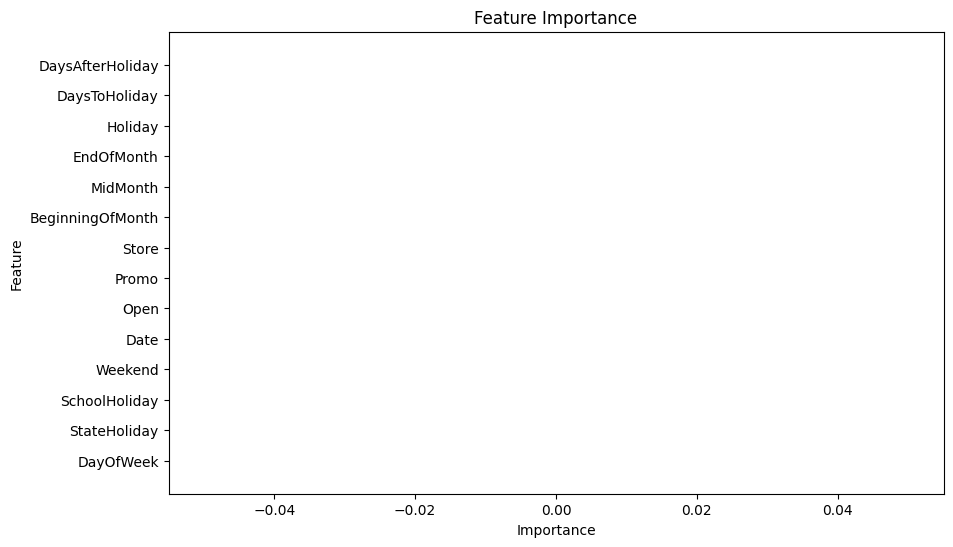

In [137]:
# Assuming rf_regressor is the trained Random Forest Regressor model
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [138]:
def bootstrap_confidence_interval(model, X, num_iterations=1000, confidence_level=0.95):
    """
    Estimate the confidence interval of predictions using bootstrapping.

    Parameters:
        model: Trained regression model.
        X (array-like): Input features for prediction.
        num_iterations (int): Number of bootstrap iterations.
        confidence_level (float): Confidence level for the interval (e.g., 0.95 for 95% confidence).

    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    predictions = []
    n = len(X)

    # Perform bootstrapping
    for _ in range(num_iterations):
        # Sample with replacement
        indices = np.random.choice(n, size=n, replace=True)
        X_sample = X.iloc[indices]
        # Make predictions on the sample
        y_pred = model.predict(X_sample)
        predictions.extend(y_pred)

    # Calculate confidence interval
    alpha = (1 - confidence_level) / 2
    lower_bound = np.percentile(predictions, alpha * 100)
    upper_bound = np.percentile(predictions, (1 - alpha) * 100)

    return lower_bound, upper_bound

# Example usage:
# Assuming rf_regressor is the trained Random Forest Regressor model
# and X_test is the testing features
lower_bound, upper_bound = bootstrap_confidence_interval(rf_regressor, X_test)
print("Confidence Interval of Predictions: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))


Confidence Interval of Predictions: [0.00, 0.00]


In [162]:
import pickle
from datetime import datetime

# Assuming rf_regressor is the trained Random Forest Regressor model
# Serialize the model
timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S-%f")
model_filename = f"{timestamp}.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(rf_regressor, file)

print("Model saved as:", model_filename)


Model saved as: 06-01-2024-15-15-28-846747.pkl


In [161]:
# Convert the 'Date' column to datetime format
trainData['Date'] = pd.to_datetime(trainData['Date'])

# Set the 'Date' column as the index
trainData.set_index('Date', inplace=True)

trainData

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Weekend,BeginningOfMonth,MidMonth,EndOfMonth,Holiday,DaysToHoliday,DaysAfterHoliday
Date,,,,,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,0,0,0,1,1,0,0
2015-07-31,2,4,6064,625,1,1,0,1,0,0,0,1,1,0,0
2015-07-31,3,4,8314,821,1,1,0,1,0,0,0,1,1,0,0
2015-07-31,4,4,13995,1498,1,1,0,1,0,0,0,1,1,0,0
2015-07-31,5,4,4822,559,1,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,1,0,0,0,0,1,1,0,1,0,0,1,0,0
2013-01-01,1112,1,0,0,0,0,1,1,0,1,0,0,1,0,0
2013-01-01,1113,1,0,0,0,0,1,1,0,1,0,0,1,0,0


In [19]:
trainData['Sales'].unique()

<DatetimeArray>
['1970-01-01 00:00:00.000005263', '1970-01-01 00:00:00.000006064',
 '1970-01-01 00:00:00.000008314', '1970-01-01 00:00:00.000013995',
 '1970-01-01 00:00:00.000004822', '1970-01-01 00:00:00.000005651',
 '1970-01-01 00:00:00.000015344', '1970-01-01 00:00:00.000008492',
 '1970-01-01 00:00:00.000008565', '1970-01-01 00:00:00.000007185',
 ...
 '1970-01-01 00:00:00.000020859', '1970-01-01 00:00:00.000025165',
 '1970-01-01 00:00:00.000021237', '1970-01-01 00:00:00.000023240',
 '1970-01-01 00:00:00.000000715', '1970-01-01 00:00:00.000020050',
 '1970-01-01 00:00:00.000001067', '1970-01-01 00:00:00.000000660',
 '1970-01-01 00:00:00.000017815', '1970-01-01 00:00:00.000023303']
Length: 21734, dtype: datetime64[ns]

In [22]:
import pandas as pd

# Function to create lag features and target variable
def create_supervised_data(data, n_lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(n_lag, 0, -1)]
    columns.append(df.shift(-1))
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    df.columns = [f'lag_{i}' for i in range(n_lag, 0, -1)] + ['target']
    return df

# Assuming 'Sales' is the column representing sales data in trainData
# Define the number of lag observations
n_lag = 1

# Create supervised learning data
supervised_data = create_supervised_data(trainData['Sales'], n_lag)

# Display the first few rows of the supervised learning data
print(supervised_data.head())


                          lag_1                        target
2 1970-01-01 00:00:00.000006064 1970-01-01 00:00:00.000013995
3 1970-01-01 00:00:00.000008314 1970-01-01 00:00:00.000004822
4 1970-01-01 00:00:00.000013995 1970-01-01 00:00:00.000005651
5 1970-01-01 00:00:00.000004822 1970-01-01 00:00:00.000015344
6 1970-01-01 00:00:00.000005651 1970-01-01 00:00:00.000008492


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data into the (-1, 1) range
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=supervised_data.columns)

# Display the first few rows of the scaled data
print(scaled_df.head())


      lag_1    target
0 -0.708118 -0.326370
1 -0.599817 -0.767900
2 -0.326370 -0.727997
3 -0.767900 -0.261438
4 -0.727997 -0.591249


In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Split the supervised learning data into input features (X) and target variable (y)
X = scaled_df.drop('target', axis=1).values
y = scaled_df['target'].values

# Reshape input features to 3D format (samples, time steps, features)
n_samples, n_steps, n_features = X.shape[0], X.shape[1], 1
X = X.reshape((n_samples, n_steps, n_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/50
25431/25431 [==============================] - 84s 3ms/step - loss: 0.0211
Epoch 2/50
25431/25431 [==============================] - 73s 3ms/step - loss: 0.0195
Epoch 3/50
25431/25431 [==============================] - 89s 3ms/step - loss: 0.0195
Epoch 4/50
25431/25431 [==============================] - 80s 3ms/step - loss: 0.0195
Epoch 5/50
25431/25431 [==============================] - 76s 3ms/step - loss: 0.0195
Epoch 6/50
25431/25431 [==============================] - 79s 3ms/step - loss: 0.0195
Epoch 7/50
25431/25431 [==============================] - 91s 4ms/step - loss: 0.0195
Epoch 8/50
25431/25431 [==============================] - 90s 4ms/step - loss: 0.0195
Epoch 9/50
25431/25431 [==============================] - 80s 3ms/step - loss: 0.0194
Epoch 10/50
25431/25431 [==============================] - 89s 3ms/step - loss: 0.0194
Epoch 11/50
25431/25431 [==============================] - 87s 3ms/step - loss: 0.0194
Epoch 12/50
25431/25431 [===========================